## 4.1 Import packages


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time
import cv2
import matplotlib.pyplot as plt

## 4.2 Input MINIST data
MNIST dataset [Click](http://yann.lecun.com/exdb/mnist/)

In [2]:
mnist = input_data.read_data_sets("data\\MNIST_data\\", one_hot=True)

W0816 10:22:04.463541 14884 deprecation.py:323] From <ipython-input-2-b64c65daac89>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0816 10:22:04.472538 14884 deprecation.py:323] From D:\APPs\Anaconda\envs\Jeary_lab\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0816 10:22:04.475533 14884 deprecation.py:323] From D:\APPs\Anaconda\envs\Jeary_lab\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for up

Extracting data\MNIST_data\train-images-idx3-ubyte.gz


W0816 10:22:04.750419 14884 deprecation.py:323] From D:\APPs\Anaconda\envs\Jeary_lab\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0816 10:22:04.754416 14884 deprecation.py:323] From D:\APPs\Anaconda\envs\Jeary_lab\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0816 10:22:04.815382 14884 deprecation.py:323] From D:\APPs\Anaconda\envs\Jeary_lab\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be rem

Extracting data\MNIST_data\train-labels-idx1-ubyte.gz
Extracting data\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting data\MNIST_data\t10k-labels-idx1-ubyte.gz


## 4.3 Input your handwriting front

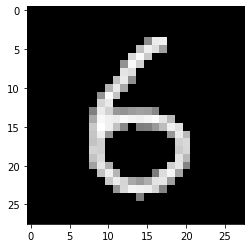

(1, 784)

In [3]:
def make_label(label_num):
    label = np.zeros((1,10),dtype='float32')
    label[:,label_num] = 1.0
    return label

label_test = make_label(6)
# the path of image
img_path = "data\\self_data\\6.jpg"
img_file = cv2.imread(img_path)
img_file = cv2.cvtColor(img_file, cv2.COLOR_RGB2GRAY)
img_file = 255 - img_file
for row in range(img_file.shape[0]):
    for col in range(img_file.shape[1]):
        if img_file[row][col] < 120.0:
            img_file[row][col] = 0
plt.imshow(img_file,'gray')
plt.show()
data_test = img_file / 255
data_test = np.float32(img_file.reshape(1, 28*28))
data_test.shape

## 4.4 Create the model
* set the number of inputnodes、the number of hidden nodes and the ideration time
* Create tf.Variable as W
* Create two tf.placeholder as B
* Create tf.placeholder as data x，label

In [4]:
input_num = 784
h1_num = 512
epochs = 3000
batch_num = 1000
lr = 0.09
W1 = tf.Variable(tf.truncated_normal([input_num, h1_num],stddev=0.1))
W2 = tf.Variable(tf.zeros([h1_num,10]))
B1 = tf.Variable(tf.zeros([h1_num]))
B2 = tf.Variable(tf.zeros([10]))
x = tf.placeholder(tf.float32, [None, input_num])
keep_prob = tf.placeholder(tf.float32)
label = tf.placeholder(tf.float32, [None,10])

hidden1 = tf.nn.relu(tf.matmul(x,W1) + B1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)
y = tf.nn.softmax(tf.matmul(hidden1_drop, W2) + B2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(label * tf.log(y), reduction_indices=[1]))
train_step = tf.train.AdagradOptimizer(lr).minimize(cross_entropy)

W0816 10:22:11.527356 14884 deprecation.py:506] From <ipython-input-4-123499e8aa0e>:15: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0816 10:22:11.630294 14884 deprecation.py:506] From D:\APPs\Anaconda\envs\Jeary_lab\lib\site-packages\tensorflow\python\training\adagrad.py:76: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## 4.5 Create an session and training

In [5]:
with tf.Session() as sess:
    start = time.time()
    tf.global_variables_initializer().run()
    for epoch in range(epochs):
        batch_xs, batch_ys = mnist.train.next_batch(batch_num)
        _,cost = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, label: batch_ys, keep_prob:0.75})
        if epoch % 100 == 0:
            print("epoch: {}, loss: {:.2f}".format(epoch, cost))
        
    stop = time.time()
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(label,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    predict_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, label: mnist.test.labels, keep_prob:1.0})
    print("The accuracy of the test data：{:.2f}%".format(predict_acc * 100))
    print("The total time：{:.2f}s".format(stop-start))
    test_acc,test_value = sess.run([accuracy,y], feed_dict={x:data_test, label:label_test, keep_prob:1.0})
    print("The accuracy of you:{:.2f}%".format(test_acc * 100))

epoch: 0, loss: 2.30
epoch: 100, loss: 0.37
epoch: 200, loss: 0.29
epoch: 300, loss: 0.27
epoch: 400, loss: 0.20
epoch: 500, loss: 0.20
epoch: 600, loss: 0.16
epoch: 700, loss: 0.16
epoch: 800, loss: 0.13
epoch: 900, loss: 0.16
epoch: 1000, loss: 0.16
epoch: 1100, loss: 0.13
epoch: 1200, loss: 0.15
epoch: 1300, loss: 0.11
epoch: 1400, loss: 0.09
epoch: 1500, loss: 0.09
epoch: 1600, loss: 0.12
epoch: 1700, loss: 0.11
epoch: 1800, loss: 0.11
epoch: 1900, loss: 0.10
epoch: 2000, loss: 0.08
epoch: 2100, loss: 0.06
epoch: 2200, loss: 0.08
epoch: 2300, loss: 0.08
epoch: 2400, loss: 0.08
epoch: 2500, loss: 0.07
epoch: 2600, loss: 0.05
epoch: 2700, loss: 0.07
epoch: 2800, loss: 0.07
epoch: 2900, loss: 0.07
The accuracy of the test data：97.74%
The total time：124.98s
The accuracy of you:100.00%


In [6]:
print("The prediction by AI is{}".format(list(test_value[0]).index(test_value[0].max())))

The prediction by AI is6
